In [ ]:
import zipfile
import os

# Define paths
zip_path = "/content/drive/MyDrive/gd/PRAICP-1001-GenderDetc.zip"  # Change to your ZIP file path
extract_path = "datasetgd"  # Directory where files will be extracted

# Extract ZIP file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Datasetgd extracted successfully!")


Datasetgd extracted successfully!


In [ ]:
import os
import shutil

# Define paths
original_path = "/content/datasetgd/Data/gender_dataset_face"
new_dataset_path = "datasetedgd"  # New organized dataset

# Define category mapping
categories = {"woman": "Female", "man": "Male"}

# Create new folders
os.makedirs(new_dataset_path, exist_ok=True)
for category in categories.values():
    os.makedirs(os.path.join(new_dataset_path, category), exist_ok=True)

# Move images
for old_category, new_category in categories.items():
    old_path = os.path.join(original_path, old_category)
    new_path = os.path.join(new_dataset_path, new_category)

    for img_name in os.listdir(old_path):
        src = os.path.join(old_path, img_name)
        dst = os.path.join(new_path, img_name)
        shutil.move(src, dst)

print("✅ Dataset reorganized successfully!")


✅ Dataset reorganized successfully!


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define image size and batch size
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

# Define dataset paths
dataset_path = "datasetedgd"  # Updated dataset path

# Apply data augmentation and normalization
datagen = ImageDataGenerator(
    rescale=1.0/255.0,  # Normalize pixel values
    rotation_range=20,   # Rotate images randomly
    width_shift_range=0.1,  # Shift width
    height_shift_range=0.1, # Shift height
    horizontal_flip=True,   # Flip images horizontally
    validation_split=0.2    # Split dataset into train (80%) and validation (20%)
)

# Load training data
train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="binary",
    subset="training"
)

# Load validation data
val_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="binary",
    subset="validation"
)

print("✅ Image preprocessing complete!")


Found 1847 images belonging to 2 classes.
Found 460 images belonging to 2 classes.
✅ Image preprocessing complete!


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model

# Load MobileNetV2 (pretrained model) without the top layer
base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights="imagenet")

# Freeze the base model (so we don't train its weights)
base_model.trainable = False

# Add custom layers for gender classification
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation="relu")(x)
x = Dropout(0.3)(x)  # Dropout to prevent overfitting
x = Dense(1, activation="sigmoid")(x)  # Binary classification (Male/Female)

# Create final model
model = Model(inputs=base_model.input, outputs=x)

# Compile the model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Train the model
EPOCHS = 30  # Adjust if needed
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=EPOCHS
)

print("✅ Model training complete!")


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
58/58 ━━━━━━━━━━━━━━━━━━━━ 128s 2s/step - accuracy: 0.7507 - loss: 0.4938 - val_accuracy: 0.8870 - val_loss: 0.2765
Epoch 2/30
58/58 ━━━━━━━━━━━━━━━━━━━━ 119s 2s/step - accuracy: 0.8909 - loss: 0.2631 - val_accuracy: 0.8978 - val_loss: 0.2333
Epoch 3/30
58/58 ━━━━━━━━━━━━━━━━━━━━ 136s 2s/step - accuracy: 0.9269 - loss: 0.1968 - val_accuracy: 0.9087 - val_loss: 0.2015
Epoch 4/30
58/58 ━━━━━━━━━━━━━━━━━━━━ 151s 2s/step - accuracy: 0.9267 - loss: 0.1943 - val_accuracy: 0.8978 - val_loss: 0.2480
Epoch 5/30
58/58 ━━━━━━━━━━━━━━━━━━━━ 115s 2s/step - accuracy: 0.9436 - loss: 0.1601 - val_accuracy: 0.9000 - val_loss: 0.2327
Epoch 6/30
58/58 ━━━━━━━━━━━━━━━━━━━━ 117s 2s/step - accuracy: 0.9393 - loss: 0.1671 - val_accuracy: 0.9326 - val_loss: 0.1943
Epoch 7/30
58/58 ━━━━━━━━━━━━━━━━━━━━ 115s 2s/step - accuracy: 0.9394 - loss: 0.1527 - val_accuracy: 0.9152 - val_loss: 0.2179
Epoch 8/30
58/58 ━━━━━━━━━━━━━━━━━━━━ 159s 2s/step - accuracy: 0.9312 - loss: 0.1569 - val_accuracy: 0.8978 - v

In [ ]:
# Load MobileNetV2
base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights="imagenet")

# Unfreeze some layers for fine-tuning
for layer in base_model.layers[-20:]:  # Unfreezing last 20 layers
    layer.trainable = True

# Add new layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation="relu")(x)
x = Dropout(0.3)(x)
x = Dense(1, activation="sigmoid")(x)

# Create model
model = Model(inputs=base_model.input, outputs=x)

# Compile with lower learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss="binary_crossentropy", metrics=["accuracy"])

# Train again with fine-tuning
EPOCHS = 30
history = model.fit(train_generator, validation_data=val_generator, epochs=EPOCHS)

print("✅ Fine-tuning complete!")


Epoch 1/30
58/58 ━━━━━━━━━━━━━━━━━━━━ 423s 7s/step - accuracy: 0.7401 - loss: 0.5077 - val_accuracy: 0.5043 - val_loss: 1.8185
Epoch 2/30
58/58 ━━━━━━━━━━━━━━━━━━━━ 385s 7s/step - accuracy: 0.9372 - loss: 0.1605 - val_accuracy: 0.6239 - val_loss: 1.0964
Epoch 3/30
58/58 ━━━━━━━━━━━━━━━━━━━━ 384s 7s/step - accuracy: 0.9619 - loss: 0.1046 - val_accuracy: 0.5478 - val_loss: 2.0427
Epoch 4/30
58/58 ━━━━━━━━━━━━━━━━━━━━ 374s 6s/step - accuracy: 0.9836 - loss: 0.0581 - val_accuracy: 0.5283 - val_loss: 2.4365
Epoch 5/30
58/58 ━━━━━━━━━━━━━━━━━━━━ 381s 7s/step - accuracy: 0.9873 - loss: 0.0424 - val_accuracy: 0.6370 - val_loss: 1.8706
Epoch 6/30
58/58 ━━━━━━━━━━━━━━━━━━━━ 377s 6s/step - accuracy: 0.9889 - loss: 0.0346 - val_accuracy: 0.5913 - val_loss: 2.0869
Epoch 7/30
58/58 ━━━━━━━━━━━━━━━━━━━━ 379s 6s/step - accuracy: 0.9949 - loss: 0.0229 - val_accuracy: 0.8283 - val_loss: 0.5255
Epoch 8/30
58/58 ━━━━━━━━━━━━━━━━━━━━ 388s 7s/step - accuracy: 0.9835 - loss: 0.0443 - val_accuracy: 0.8565 - v

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

# Load EfficientNetB0 as base model
base_model = EfficientNetB0(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

# Freeze base model layers
base_model.trainable = False

# Add new layers
x = GlobalAveragePooling2D()(base_model.output)  # Apply Global Average Pooling
x = Dense(128, activation="relu")(x)  # First dense layer
x = Dense(64, activation="relu")(x)   # Second dense layer
output = Dense(1, activation="sigmoid")(x)  # Final output layer

# Create final model
model = Model(inputs=base_model.input, outputs=output)  # ✅ Connect layers properly

# Compile model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss="binary_crossentropy",
              metrics=["accuracy"])

model.summary()


16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling (Rescaling)     │ (None, 224, 224, 3)    │              0 │ input_layer_6[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ normalization             │ (None, 224, 224, 3)    │              7 │ rescaling[0][0]        │
│ (Normalization)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling_1 (Rescaling)   │ (None, 224, 224, 3)    │              0 │ normalization[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv_pad             │ (None, 225, 225, 3)    │              0 │ rescaling_1[0][0]      │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv (Conv2D)        │ (None, 112, 112, 32)   │            864 │ stem_conv_pad[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_bn                   │ (None, 112, 112, 32)   │            128 │ stem_conv[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_activation           │ (None, 112, 112, 32)   │              0 │ stem_bn[0][0]          │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_dwconv            │ (None, 112, 112, 32)   │            288 │ stem_activation[0][0]  │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_bn                │ (None, 112, 112, 32)   │            128 │ block1a_dwconv[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_activation        │ (None, 112, 112, 32)   │              0 │ block1a_bn[0][0]       │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_squeeze        │ (None, 32)             │              0 │ block1a_activation[0]… │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reshape        │ (None, 1, 1, 32)       │              0 │ block1a_se_squeeze[0]… │
│ (Reshape)                 │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reduce         │ (None, 1, 1, 8)        │            264 │ block1a_se_reshape[0]… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 4,221,860 (16.11 MB)

 Trainable params: 172,289 (673.00 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define paths
train_dir = "datasetedgd"  # Corrected path

# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(rescale=1.0/255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode="binary",
    subset="training"  # Make sure this matches "training" or "validation"
)

val_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode="binary",
    subset="validation"  # Ensure this matches "validation"
)


Found 1847 images belonging to 2 classes.
Found 460 images belonging to 2 classes.


In [ ]:
import os

train_dir = "datasetedgd"

print("Train Classes:", os.listdir(train_dir))


Train Classes: ['Male', 'Female']


In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout

# Define image dimensions (if not already defined)
IMG_HEIGHT = 224
IMG_WIDTH = 224

# Load MobileNetV2 with pretrained weights
base_model = MobileNetV2(input_shape=(IMG_HEIGHT, IMG_WIDTH, 3), include_top=False, weights="imagenet")

# Freeze the base model layers
base_model.trainable = False

# Build the model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.5),
    Dense(1, activation="relu"),
    Dense(1, activation="sigmoid")  # Binary classification (Male/Female)
])

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.applications import MobileNetV2

# Load MobileNetV2
base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights="imagenet")

# Freeze base model
base_model.trainable = False

# Build Model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),  # Replaces Flatten
    Dropout(0.5),  # Helps prevent overfitting
    Dense(64, activation="relu"),  # Reduce dense layer size
    Dense(1, activation="sigmoid")  # Binary classification
])

# Compile
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])


In [ ]:
EPOCHS = 30

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=EPOCHS
)

Epoch 1/30
58/58 ━━━━━━━━━━━━━━━━━━━━ 94s 2s/step - accuracy: 0.7054 - loss: 0.5223 - val_accuracy: 0.8717 - val_loss: 0.2834
Epoch 2/30
58/58 ━━━━━━━━━━━━━━━━━━━━ 83s 1s/step - accuracy: 0.8780 - loss: 0.2768 - val_accuracy: 0.8804 - val_loss: 0.2781
Epoch 3/30
58/58 ━━━━━━━━━━━━━━━━━━━━ 77s 1s/step - accuracy: 0.9045 - loss: 0.2394 - val_accuracy: 0.8696 - val_loss: 0.3016
Epoch 4/30
58/58 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.9217 - loss: 0.2072 - val_accuracy: 0.8978 - val_loss: 0.2305
Epoch 5/30
58/58 ━━━━━━━━━━━━━━━━━━━━ 79s 1s/step - accuracy: 0.9040 - loss: 0.2119 - val_accuracy: 0.8587 - val_loss: 0.3119
Epoch 6/30
58/58 ━━━━━━━━━━━━━━━━━━━━ 79s 1s/step - accuracy: 0.9294 - loss: 0.2012 - val_accuracy: 0.9065 - val_loss: 0.2184
Epoch 7/30
58/58 ━━━━━━━━━━━━━━━━━━━━ 92s 2s/step - accuracy: 0.9323 - loss: 0.1833 - val_accuracy: 0.8783 - val_loss: 0.2930
Epoch 8/30
58/58 ━━━━━━━━━━━━━━━━━━━━ 79s 1s/step - accuracy: 0.9204 - loss: 0.1890 - val_accuracy: 0.9130 - val_loss:

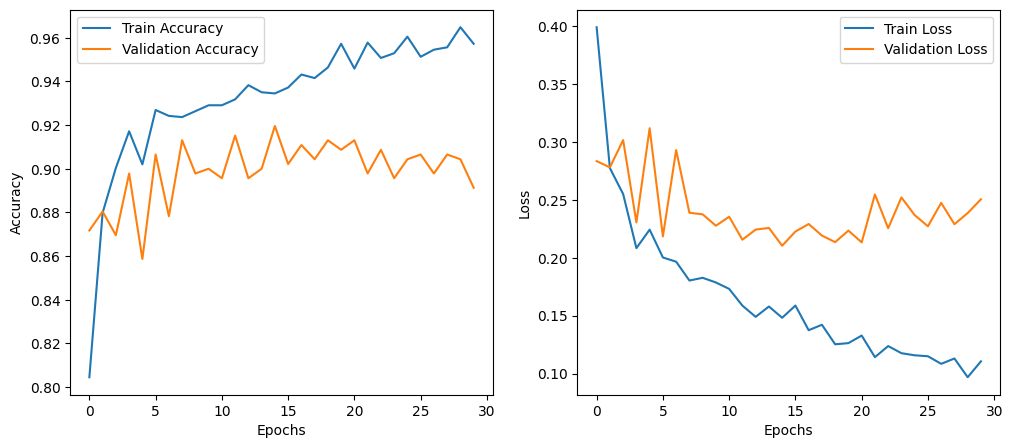

In [ ]:
import matplotlib.pyplot as plt

# Plot accuracy & loss graphs
plt.figure(figsize=(12,5))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define test dataset path
test_dir = "datasetedgd"

# Preprocess test data (same as training data)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)  # Normalize pixel values

# Load test data
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),  # Same as training
    batch_size=32,
    class_mode="binary",  # Binary classification for gender
    shuffle=False  # Do not shuffle for consistent evaluation
)

Found 2307 images belonging to 2 classes.


In [ ]:
model.save('my_model.keras')

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
import os

# Load the trained model
model_path = "my_model.keras"  # Save your trained model
#model.save(model_path) # Removed model save here. Model will be saved elsewhere.

# Load an image and preprocess
def predict_gender(img_path, model, threshold=0.5): # added threshold as parameter
    if not os.path.exists(img_path): # Check if the image exists
        print(f"Error: Image not found at {img_path}") # Inform the user
        return None, None # Exit the function, return None for both values

    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0  # Normalize

    # Make prediction
    prediction = model.predict(img_array)
    label = "Male" if prediction[0][0] > threshold else "Female"

    print(f"Predicted Gender: {label}")
    return prediction, label # return both values


# Test the model
test_image_path = "/content/datasetedgd/Female/face_10.jpg"  # Replace with your image path
if not os.path.exists(test_image_path): # Check if a default test image has been provided
    print(f"Please ensure 'test.jpg' exists in the current directory or update 'test_image_path' to point to your test image.")
else:
    prediction, label = predict_gender(test_image_path, model, threshold=0.4) # Call predict gender with a threshold
    if prediction is not None:
       print(f"Prediction: {prediction}") # print prediction to demonstrate the return values

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predicted Gender: Female
Prediction: [[0.00039116]]


In [ ]:
# Predict on the test dataset
test_preds = model.predict(test_generator)
test_preds = (test_preds > 0.5).astype(int)  # Convert probabilities to binary labels (0 or 1)

73/73 ━━━━━━━━━━━━━━━━━━━━ 84s 1s/step


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score, recall_score

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define test dataset path
test_dir = "datasetedgd"

# Preprocess test data (same as training data)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)  # Normalize pixel values

# Load test data
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),  # Same as training
    batch_size=32,
    class_mode="binary",  # Binary classification for gender
    shuffle=False  # Do not shuffle for consistent evaluation
)

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, recall_score

# True labels
true_labels = test_generator.classes

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(true_labels, test_preds))

# Classification report
print("\nClassification Report:")
print(classification_report(true_labels, test_preds, target_names=["Female", "Male"]))

# Accuracy
test_accuracy = accuracy_score(true_labels, test_preds)
print(f"\nTest Accuracy: {test_accuracy * 100:.2f}%")

#F1-score
f1 = f1_score(true_labels, test_preds)
print(f"\nF1-Score: {f1}")

#Recall
recall = recall_score(true_labels, test_preds)
print(f"Recall: {recall}")

Found 2307 images belonging to 2 classes.
Confusion Matrix:
[[1085   49]
 [  12 1161]]

Classification Report:
              precision    recall  f1-score   support

      Female       0.99      0.96      0.97      1134
        Male       0.96      0.99      0.97      1173

    accuracy                           0.97      2307
   macro avg       0.97      0.97      0.97      2307
weighted avg       0.97      0.97      0.97      2307


Test Accuracy: 97.36%

F1-Score: 0.9744020142677298
Recall: 0.989769820971867


In [ ]:
model.save('my_model.keras')

In [ ]:
def predict_gender(img_path, threshold=0.4):  # Lower threshold for more "Male" predictions
    img_array = preprocess_image(img_path)
    prediction = model.predict(img_array)
    label = "Male" if prediction[0][0] > threshold else "Female"
    return label

In [ ]:
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))  # Resize to match model input
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0  # Normalize pixel values
    return img_array

In [ ]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight(
    'balanced',
    classes=np.unique(train_generator.classes),
    y=train_generator.classes
)
class_weights = dict(enumerate(class_weights))

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    class_weight=class_weights
)

Epoch 1/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 86s 1s/step - accuracy: 0.9598 - loss: 0.1029 - val_accuracy: 0.9022 - val_loss: 0.2394
Epoch 2/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 138s 1s/step - accuracy: 0.9625 - loss: 0.1005 - val_accuracy: 0.8978 - val_loss: 0.2692
Epoch 3/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step - accuracy: 0.9555 - loss: 0.1103 - val_accuracy: 0.9043 - val_loss: 0.2435
Epoch 4/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 83s 1s/step - accuracy: 0.9663 - loss: 0.0851 - val_accuracy: 0.9043 - val_loss: 0.2404
Epoch 5/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 78s 1s/step - accuracy: 0.9541 - loss: 0.1064 - val_accuracy: 0.9130 - val_loss: 0.2181
Epoch 6/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step - accuracy: 0.9674 - loss: 0.0801 - val_accuracy: 0.9196 - val_loss: 0.2184
Epoch 7/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 83s 1s/step - accuracy: 0.9720 - loss: 0.0809 - val_accuracy: 0.9087 - val_loss: 0.2200
Epoch 8/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 83s 1s/step - accuracy: 0.9696 - loss: 0.0811 - val_accuracy: 0.9065 - val_loss

In [ ]:
model.save('my_model.keras')